First we need to upload our dataset



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Heart_Disease_Dataset.csv to Heart_Disease_Dataset.csv


The needed libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


Reading csv file

In [ ]:
data = pd.read_csv('Heart_Disease_Dataset.csv')
data[0:5]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
data.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [ ]:
feature_df = data[['age' , 	'sex'	,'chest pain type'	,'resting bp s',	'cholesterol'	,'fasting blood sugar',	'resting ecg',	'max heart rate'	,'exercise angina',	'oldpeak',	'ST slope']]
feature_df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2
1186,68,1,4,144,193,1,0,141,0,3.4,2
1187,57,1,4,130,131,0,0,115,1,1.2,2
1188,57,0,2,130,236,0,2,174,0,0.0,2


## A :
#### 1) size of data
#### 2) missed features existance
#### 3) Class balanced or not
#### 4) plot the sex and age curves ( 4 plots )

In [ ]:
""" A 1) """
np.shape(data) # we have 11 features 1 label and 1190 rows of values


(1190, 12)

In [ ]:
""" A 2) """
# Check summary statistics
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359 

Since count of all features is 1190, there is no missed data

In [ ]:
""" A 3) """
counts = data[['target']].value_counts()
balance_metric = max(counts)/sum(counts)
balance_metric

0.5285714285714286

0.52 means the dataset is reasonably balanced

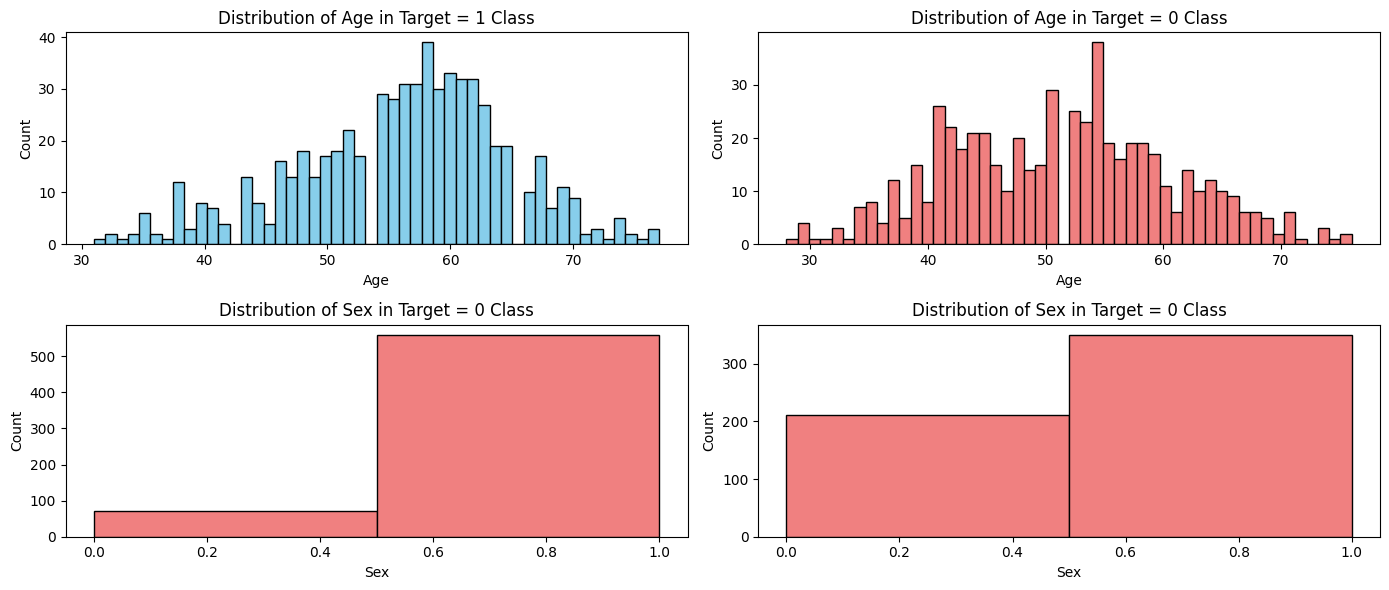

In [ ]:
""" A 4) """

# Create a figure with two subplots
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2, figsize=(14, 6))

# Filter data for age target = 1
target_1_data = data[data['target'] == 1]
ax1.hist(target_1_data['age'], bins=50, color='skyblue', edgecolor='black')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Age in Target = 1 Class')

# Filter data for age target = 0
target_0_data = data[data['target'] == 0]
ax2.hist(target_0_data['age'], bins=50, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Age in Target = 0 Class')

# Filter data for sex target = 1
target_0_data = data[data['target'] == 1]
ax3.hist(target_0_data['sex'], bins=2, color='lightcoral', edgecolor='black')
ax3.set_xlabel('Sex')
ax3.set_ylabel('Count')
ax3.set_title('Distribution of Sex in Target = 0 Class')

# Filter data for sex target = 0
target_0_data = data[data['target'] == 0]
ax4.hist(target_0_data['sex'], bins=2, color='lightcoral', edgecolor='black')
ax4.set_xlabel('Sex')
ax4.set_ylabel('Count')
ax4.set_title('Distribution of Sex in Target = 0 Class')

plt.tight_layout()
plt.show()

## B
##Perform Z_test to data. Report:
#### 1) outliers with z > 3 , z < -3
#### 2) size after missing outliers

In [ ]:
""" B 4) """

data = pd.read_csv('Heart_Disease_Dataset.csv')
features = {'age' , 	'sex'	,'chest pain type'	,'resting bp s',	'cholesterol'	,'fasting blood sugar',	'resting ecg',	'max heart rate'	,'exercise angina',	'oldpeak',	'ST slope'}
for col in features :
    data['z' +'_' + str(col)] = (data[col] - data[col].mean()) / data[col].std()


# Define the threshold for outliers (e.g., Z > 3 or Z < -3)
z_threshold = 3
sub = False
for col in features :
  sub |= (data['z_'+str(col)].abs() > z_threshold)
# Print outliers
outliers = data[sub] # just one outlier cause the whole row to be removed
rest_data = data[~sub]
print('Size after outliers elimination is' + str(rest_data.shape))  # size after removing outliers
outliers[features]

Size after outliers elimination is(1162, 23)


<ipython-input-202-909b1fa8512f>:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  outliers[features]


,max heart rate,resting bp s,chest pain type,fasting blood sugar,resting ecg,cholesterol,ST slope,sex,exercise angina,age,oldpeak
30,130,145,3,0,0,518,2,1,0,53,0.0
76,130,118,4,0,0,529,2,1,0,32,0.0
109,106,190,2,0,0,241,1,1,0,39,0.0
149,125,130,4,1,0,603,2,1,1,54,1.0
167,140,140,4,0,1,231,2,1,1,50,5.0
242,142,200,4,0,0,198,2,1,1,54,2.0
325,133,100,4,1,1,0,2,1,0,46,-2.6
366,140,200,4,0,0,0,2,0,1,64,1.0
371,63,135,4,0,0,0,1,1,1,60,0.5
391,60,140,4,0,0,0,2,1,0,51,0.0


### C
Perfom Normalization

In [ ]:
""" C """

data = pd.read_csv('Heart_Disease_Dataset.csv')
Numeric_features = {'age' 	,'resting bp s',	'cholesterol'	,	'max heart rate'	,	'oldpeak'}
for feature in Numeric_features:
  data[feature] = data[feature]/ max(data[feature])
data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0.519481,1,2,0.70,0.479270,0,0,0.851485,0,0.000000,1,0
1,0.636364,0,3,0.80,0.298507,0,0,0.772277,0,0.161290,2,1
2,0.480519,1,2,0.65,0.469320,0,1,0.485149,0,0.000000,1,0
3,0.623377,0,4,0.69,0.354892,0,0,0.534653,1,0.241935,2,1
4,0.701299,1,3,0.75,0.323383,0,0,0.603960,0,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0.584416,1,1,0.55,0.437811,0,0,0.653465,0,0.193548,2,1
1186,0.883117,1,4,0.72,0.320066,1,0,0.698020,0,0.548387,2,1
1187,0.740260,1,4,0.65,0.217247,0,0,0.569307,1,0.193548,2,1
1188,0.740260,0,2,0.65,0.391376,0,2,0.861386,0,0.000000,2,1


### D
#### 1) split data into 70% 30% for train and test
#### 2) Perform SVM
##### 2.1) linear kernel
##### 2.2) RBF kernel
##### 2.3) Poⅼynoⅿinaⅼ kernel
#### 3) Report test metric results F1 - recall - Percision - Accuracy





In [ ]:
""" D 1) """
feature_df = data[list(features)]
x = np.asarray(feature_df)
data['target'] = data['target'].astype('int')
y = np.asarray(data['target'])
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (833, 11) (833,)
Test set: (357, 11) (357,)


In [ ]:
""" D 2) """
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grids for each kernel
param_grid_linear = {'C': [0.1, 1, 10, 100]}
param_grid_rbf = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
param_grid_poly = {'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4, 5]}

# Create SVM models with different kernels
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_poly = SVC(kernel='poly')


# Perform grid search for each kernel
grid_search_linear = GridSearchCV(svm_linear, param_grid_linear, scoring='accuracy', cv=5)
grid_search_rbf = GridSearchCV(svm_rbf, param_grid_rbf, scoring='accuracy', cv=5)
grid_search_poly = GridSearchCV(svm_poly, param_grid_poly, scoring='accuracy', cv=5)

# Fit the models and find the best hyperparameters
grid_search_linear.fit(x_train, y_train)
grid_search_rbf.fit(x_train, y_train)
grid_search_poly.fit(x_train, y_train)

# Get the best parameters and accuracy for each kernel
best_params_linear = grid_search_linear.best_params_
best_accuracy_linear = grid_search_linear.best_score_

best_params_rbf = grid_search_rbf.best_params_
best_accuracy_rbf = grid_search_rbf.best_score_

best_params_poly = grid_search_poly.best_params_
best_accuracy_poly = grid_search_poly.best_score_
print('RBF : ' +str(best_params_rbf))
print('linear : ' +str(best_params_linear))
print('poly : ' +str(best_params_poly))
print('best accuracy of linear is : ' + str(best_accuracy_linear))
print('best accuracy of rbf is : ' + str(best_accuracy_rbf))
print('best accuracy of poly is : ' + str(best_accuracy_poly))


RBF : {'C': 1, 'gamma': 1}
linear : {'C': 0.1}
poly : {'C': 100, 'degree': 2}
best accuracy of linear is : 0.8463097900584374
best accuracy of rbf is : 0.8631628309645769
best accuracy of poly is : 0.8666979294423202


In [ ]:
""" D 3) """
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


svm_linear = SVC(kernel='linear' , C = 1)
svm_rbf = SVC(kernel='rbf' , gamma = 14)
svm_poly = SVC(kernel='poly' , C = 100 , degree = 2)

svm_linear.fit(x_train, y_train)
yhat_linear = svm_linear.predict(x_test)
svm_rbf.fit(x_train, y_train)
yhat_rbf = svm_rbf.predict(x_test)
svm_poly.fit(x_train, y_train )
yhat_poly = svm_poly.predict(x_test)


f1_rbf = f1_score(y_test, yhat_rbf, average='weighted')
f1_linear = f1_score(y_test, yhat_linear, average='weighted')
f1_poly = f1_score(y_test, yhat_poly, average='weighted')

accuracy_rbf = accuracy_score(y_test, yhat_rbf)
accuracy_linear = accuracy_score(y_test, yhat_linear)
accuracy_poly = accuracy_score(y_test, yhat_poly)

recal_rbf = recall_score(y_test, yhat_rbf, average='weighted')
recal_linear = recall_score(y_test, yhat_linear, average='weighted')
recal_poly = recall_score(y_test, yhat_poly, average='weighted')

perc_rbf = precision_score(y_test, yhat_rbf, average='weighted')
perc_linear = precision_score(y_test, yhat_linear, average='weighted')
perc_poly = precision_score(y_test, yhat_poly, average='weighted')

print('accuracy_rbf : ' +str(accuracy_rbf))
print('accuracy_linear : ' +str(accuracy_linear))
print('accuracy_poly : ' +str(accuracy_poly))

print('f1_rbf : ' +str(f1_rbf))
print('f1_linear : ' +str(f1_linear))
print('f1_poly : ' +str(f1_poly))

print('recal_rbf : ' +str(recal_rbf))
print('recal_linear : ' +str(recal_linear))
print('recal_poly : ' +str(recal_poly))

print('perc_rbf : ' +str(perc_rbf))
print('perc_linear : ' +str(perc_linear))
print('perc_poly : ' +str(perc_poly))

accuracy_rbf : 0.8571428571428571
accuracy_linear : 0.803921568627451
accuracy_poly : 0.8263305322128851
f1_rbf : 0.8556541058044125
f1_linear : 0.8041837055677887
f1_poly : 0.8265627106457556
recal_rbf : 0.8571428571428571
recal_linear : 0.803921568627451
recal_poly : 0.8263305322128851
perc_rbf : 0.8629032258064515
perc_linear : 0.8057068981438729
perc_poly : 0.8280912364945977
